## LAB 2

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Exercise 1
Source used: http://www.math.uchicago.edu/~may/VIGRE/VIGRE2010/REUPapers/Mcquighan.pdf

In [2]:
def generate_poisson_trajectory(lbda, T):
    ts, t = [0], 0
    while t <= T:
        u = np.random.uniform(0, 1)
        y = -math.log(1 - u) / lbda
        t = t + y
        if t <= T:
            ts.append(t)
    return ts

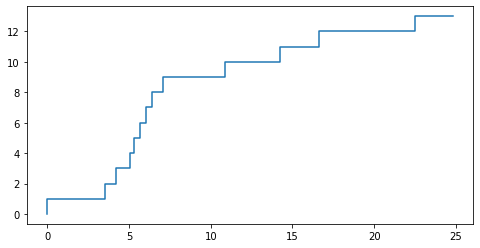

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))

ts = generate_poisson_trajectory(0.5, 25)
ax.step(ts, [i for i in range(0, len(ts))])
ax

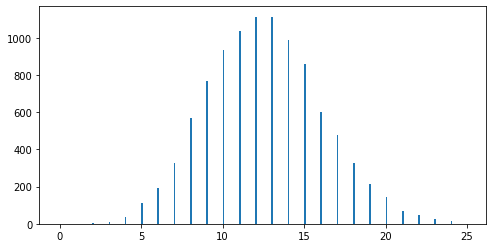

In [4]:
lbda = 0.5
T = 25
results = []
for x in range(0, 10000):
    results.append(len(generate_poisson_trajectory(lbda, T)) - 1)

fig, ax = plt.subplots(figsize=(8, 4))
data = np.arange(0, 25, 0.1)
ax.hist(results, bins=data)
ax

# Exercise 2
First method

In [5]:
def generate_wiener_trajectory1(T):
    t, w = [i for i in range(0, T+1)], [0]
    for i in t[:-1]:
        w.append(w[i] + math.sqrt(t[i+1] - t[i]) * np.random.normal())
    return w

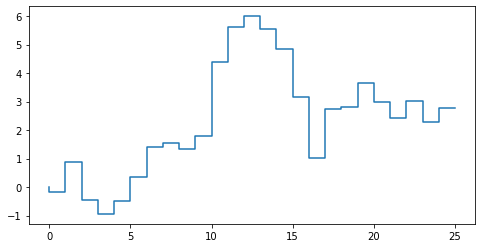

In [9]:
w = generate_wiener_trajectory1(25)

fig, ax = plt.subplots(figsize=(8, 4))
ax.step([i for i in range(0, len(w))], w)
ax

Second method

In [7]:
def create_sigma(T):
    sigma = [[0.0] * T for i in range(0, T)]
    for i in range(0, T):
        for j in range(0, T):
            sigma[i][j] = min(i+1, j+1)
    return sigma

def cholesky(S):
    n = len(S)
    L = [[0.0] * n for i in range(0, n)]
    for i in range(0, n):
        for k in range(0, i + 1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(0, k))
            if i == k:
                L[i][k] = math.sqrt(S[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (S[i][k] - tmp_sum))
    return L

def generate_wiener_trajectory2(T):
    sigma = create_sigma(T-1)
    L = np.array(cholesky(sigma))
    X = np.array([np.random.normal() for i in range(0, T-1)])
    return [0] + list(L@X)

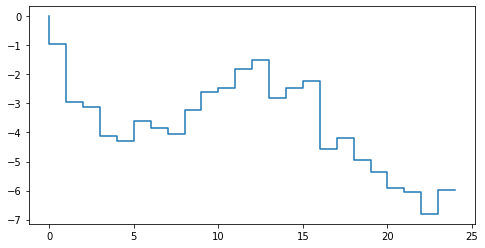

In [10]:
w = generate_wiener_trajectory2(25)

fig, ax = plt.subplots(figsize=(8, 4))
ax.step([i for i in range(0, len(w))], w)
ax

Time comparison

In [16]:
T = 300
start = time.time()
w = generate_wiener_trajectory1(T)
end = time.time()
print("First method: ", end - start)

start = time.time()
w = generate_wiener_trajectory2(T)
end = time.time()
print("Second method: ", end - start)

First method:  0.0007491111755371094
Second method:  0.37170958518981934
